In [2]:
# importing necessary modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit

import matplotlib.image as mpimg


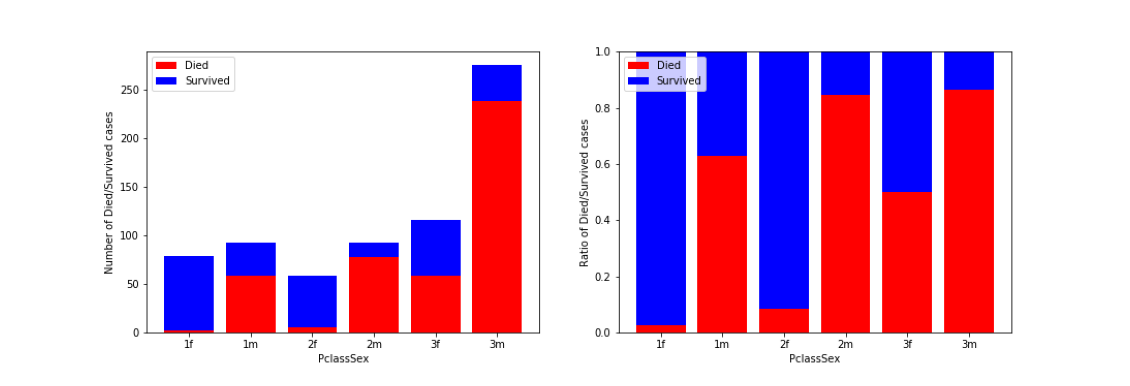

In [3]:
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
# 1. Look at the big picture and define the objectives of the project

# This project is a practice Kaggle project to predict survival on Titanic based
# on the information of the passengers.

# In this notebook we will explore the Kaggle Titanic dataset and study the relation
# between the features of the dataset (or information of the passengers) and the
# target variable (target variable is 1 when the passenger has survived and 0 when
# the passenger died).

# We try to find features/categories or engineered features/categories that have
# a survival/death rate of more than 80%. As an example consider the barplot below.

plt.figure(figsize=(20,10))
plt.axis('off')
img = mpimg.imread('PclassSex.png')
imgplot = plt.imshow(img)

In [4]:
# This bar plot shows the distribution of the combination of the Pclass (1,2,3) and Sex (male, female) features
# relative to the Survived column. The category '1f' refers to Sex:female and Pclass:1, similarly '1m' refers to
# Sex:male and Pclass:1, etc.

# As seen from the barplot above the categories '1f', '2f', '2m' and '3m' have a Survival/death rate above 80%.
# Categories '1f' and '2f' have more than 90% survival rate for females of Pclass 1 and 2 and Categories '2m'
# and '3m' have a death rate of more than 80% for males of Pclass 2 and 3.


In [5]:
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
# 2. Get the data

In [6]:

path_to_train_data = 'train.csv'
path_to_test_data = 'test.csv'

train_total = pd.read_csv(path_to_train_data)
test_total = pd.read_csv(path_to_test_data)


In [7]:
######################################################################################################
######################################################################################################
######################################################################################################
######################################################################################################
# 3. Explore the data

In [8]:
# Here we divide the train_total set into train and test sets. We'll use the
# StratifiedShuffleSplit method to make sure the split keeps the same ditribution
# of the target variable.

In [9]:

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(train_total, train_total["Survived"]):
    train = train_total.iloc[train_index]
    test = train_total.iloc[test_index]
    
train = train.reset_index()
test = test.reset_index()

In [10]:
# Explore the train dataset. 

In [11]:
train.head()

,index,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,692,693,1,3,"Lam, Mr. Ali",male,NaN,0,0,1601,56.4958,NaN,S
1,481,482,0,2,"Frost, Mr. Anthony Wood ""Archie""",male,NaN,0,0,239854,0.0000,NaN,S
2,527,528,0,1,"Farthing, Mr. John",male,NaN,0,0,PC 17483,221.7792,C95,S
3,855,856,1,3,"Aks, Mrs. Sam (Leah Rosen)",female,18.0,0,1,392091,9.3500,NaN,S
4,801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        712 non-null    int64  
 1   PassengerId  712 non-null    int64  
 2   Survived     712 non-null    int64  
 3   Pclass       712 non-null    int64  
 4   Name         712 non-null    object 
 5   Sex          712 non-null    object 
 6   Age          575 non-null    float64
 7   SibSp        712 non-null    int64  
 8   Parch        712 non-null    int64  
 9   Ticket       712 non-null    object 
 10  Fare         712 non-null    float64
 11  Cabin        160 non-null    object 
 12  Embarked     710 non-null    object 
dtypes: float64(2), int64(6), object(5)
memory usage: 72.4+ KB


In [13]:
train.describe()

,index,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,575.000000,712.000000,712.000000,712.000000
mean,443.405899,444.405899,0.383427,2.308989,29.807687,0.492978,0.390449,31.819826
std,257.465527,257.465527,0.486563,0.833563,14.485211,1.060720,0.838134,48.059104
min,0.000000,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,221.750000,222.750000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,438.500000,439.500000,0.000000,3.000000,28.500000,0.000000,0.000000,14.454200
75%,666.250000,667.250000,1.000000,3.000000,39.000000,1.000000,0.000000,31.000000
max,890.000000,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Lets create a function that will make barplots of the distribution of
# each feature relative to the target variable (Survived column).

In [15]:
# Input of barplot function: barplot takes a dataframe (dataf) with two columns as input.
# dataf's first column is a categorical variable and the second column is its binary target
# variable.

# What barplot does: The function barplots the distribution of each category of the
# categorical variable with respect to the binary target variable and outputs df1, df0
# and fig.

# Output of barplot function: barplot outputs df1, df0 dataframes and fig. The df1 dataframe
# has two columns, its first column is the categories of the categorical variable and the
# second column is the number of positive cases (target variable equal to 1) corresponding to
# each category. Similarly the df0 dataframe has two columns, its first column is the
# categories of the categorical variable and the second column is the number of negative
# cases (target variable equal to 0) corresponding to each category. fig is the figure variable
# of the barplots.

def barplot(dataf):
    
    cat_name = dataf.columns[0]
    tar_name = dataf.columns[1]    
    
    categories = dataf[~dataf[dataf.columns[0]].isnull()][dataf.columns[0]].unique()
    try:
        categories.sort()
    except:
        pass
    
    numsur = []
    
    for j in range(len(categories)):
        surv = []
        catj = dataf[dataf[cat_name] == categories[j]]
        surv.append((catj[tar_name] == 0).sum())
        surv.append((catj[tar_name] == 1).sum())
        numsur.append(surv)
    
    numsur = np.array(numsur)
    
    df0 = pd.DataFrame({cat_name:list(categories), "# of Deaths": list(numsur[:,0])})
    df1 = pd.DataFrame({cat_name:list(categories), "# Survived": list(numsur[:,1])})
    
    ind = np.arange(len(categories))
    
    fig ,(sub1,sub2) = plt.subplots(1,2)
    fig.set_size_inches(15,5)
    
    p00 = sub1.bar(ind , tuple(numsur[:,0]),color = 'r')
    p01 = sub1.bar(ind , tuple(numsur[:,1]), bottom=tuple(numsur[:,0]),color = 'b')
    plt.sca(sub1)
    plt.xticks(ind, tuple(categories))
    sub1.set_xlabel(cat_name)
    sub1.legend((p00[0], p01[0]), ('Died', 'Survived'))
    sub1.set_ylabel("Number of Died/Survived cases" )
    
    r1 = numsur[:,1]/(numsur[:,0]+numsur[:,1])
    r0 = numsur[:,0]/(numsur[:,0]+numsur[:,1])
    
    p10 = sub2.bar(ind , tuple(r0),color = 'r')
    p11 = sub2.bar(ind , tuple(r1), bottom=tuple(r0),color = 'b')
    plt.sca(sub2)
    plt.xticks(ind, tuple(categories))
    sub2.set_xlabel(cat_name)
    sub2.legend((p10[0], p11[0]), ('Died', 'Survived'))
    sub2.set_ylabel("Ratio of Died/Survived cases" )
    sub2.set_ylim(0,1)
        
    return df1, df0, fig


In [16]:
######################################################################################################
######################################################################################################
# Pclass column ######################################################################################

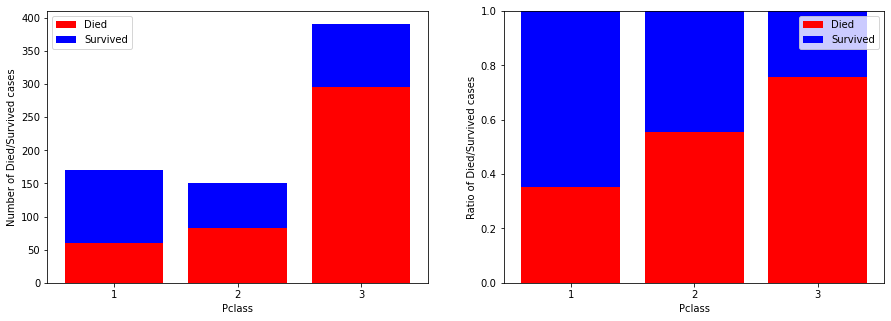

In [17]:
df1, df0, fig = barplot(train[["Pclass","Survived"]].copy())

In [18]:
df0

,Pclass,# of Deaths
0,1,60
1,2,83
2,3,296


In [19]:
######################################################################################################
######################################################################################################
# Sex Column #########################################################################################

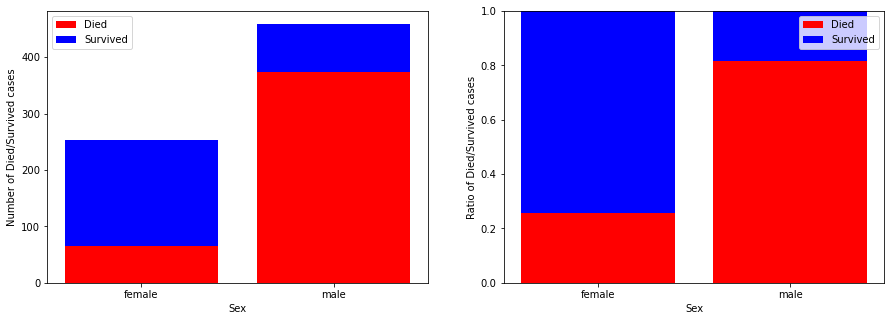

In [20]:
df1, df0, fig = barplot(train[["Sex","Survived"]].copy())

In [21]:
df0

,Sex,# of Deaths
0,female,65
1,male,374


In [22]:
df1

,Sex,# Survived
0,female,188
1,male,85


In [23]:
######################################################################################################
######################################################################################################
# Pclass & Sex combined ##############################################################################

In [24]:
# Creating the PclassSex dataframe with two columns of 'PclassSex' and 'Survived'

PclassSex = pd.DataFrame(train['Survived'].copy())
PclassSex.insert(0,"PclassSex",np.nan)

# Filling in the column of 'PclassSex' with appropriate values. e.g. a passenger
# that is male and of Pclass 2 is assigned 2m, etc.

PclassSex.loc[(train['Sex']=='male') & (train['Pclass']== 3),'PclassSex'] = '3m'
PclassSex.loc[(train['Sex']=='male') & (train['Pclass']== 2),'PclassSex'] = '2m'
PclassSex.loc[(train['Sex']=='male') & (train['Pclass']== 1),'PclassSex'] = '1m'

PclassSex.loc[(train['Sex']=='female') & (train['Pclass']== 3),'PclassSex'] = '3f'
PclassSex.loc[(train['Sex']=='female') & (train['Pclass']== 2),'PclassSex'] = '2f'
PclassSex.loc[(train['Sex']=='female') & (train['Pclass']== 1),'PclassSex'] = '1f'

In [25]:
PclassSex.head()

,PclassSex,Survived
0,3m,1
1,2m,0
2,1m,0
3,3f,1
4,2f,1


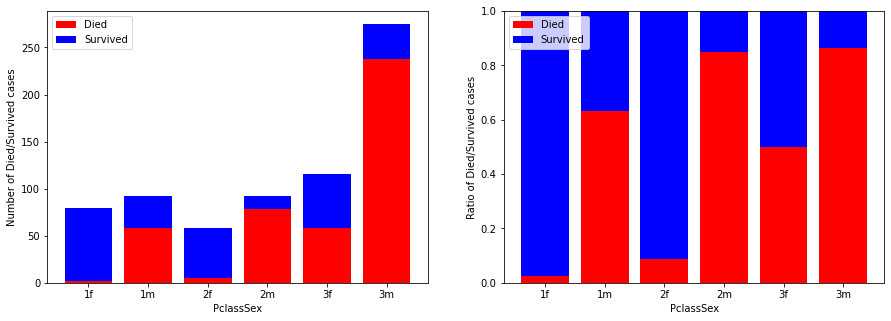

In [26]:
df1, df0, fig = barplot(PclassSex[["PclassSex","Survived"]].copy())

In [27]:
df0

,PclassSex,# of Deaths
0,1f,2
1,1m,58
2,2f,5
3,2m,78
4,3f,58
5,3m,238


In [28]:
# Note: The above analysis shows that the combined effect of Sex and Pclass columns
# results in an improvement of survival/death rate as can be seen from the 1f, 2f,
# 2m and 3m categories in the barplot above.

# The above analysis is for illustration purposes and it is not necessary to create
# a PclassSex column for machine learning as machine learning models can identify
# these simple patterns.

In [29]:
######################################################################################################
######################################################################################################
# SibSp Column #######################################################################################

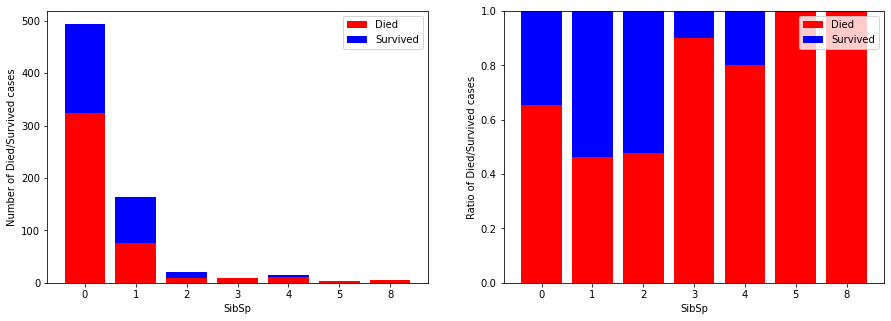

In [30]:
df1, df0, fig = barplot(train[["SibSp","Survived"]].copy())

In [31]:
######################################################################################################
######################################################################################################
# Parch Column #####################################################

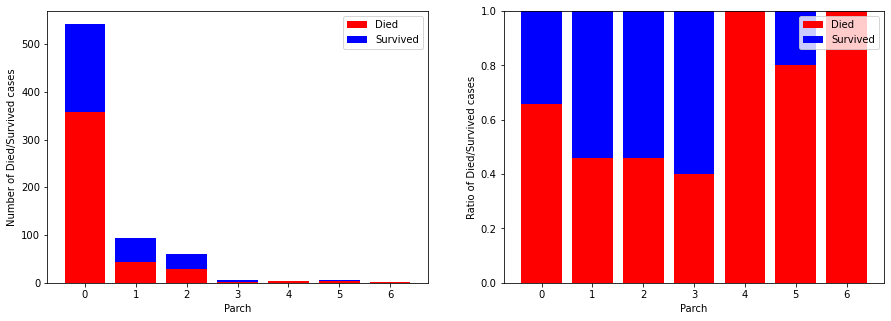

In [32]:
df1, df0, fig = barplot(train[["Parch","Survived"]].copy())

In [33]:
######################################################################################################
######################################################################################################
# famem column: Adding SibSp & Parch columns results in the family members column

In [34]:
dataf = train.copy()
dataf['famem'] = dataf['SibSp'] + dataf['Parch']

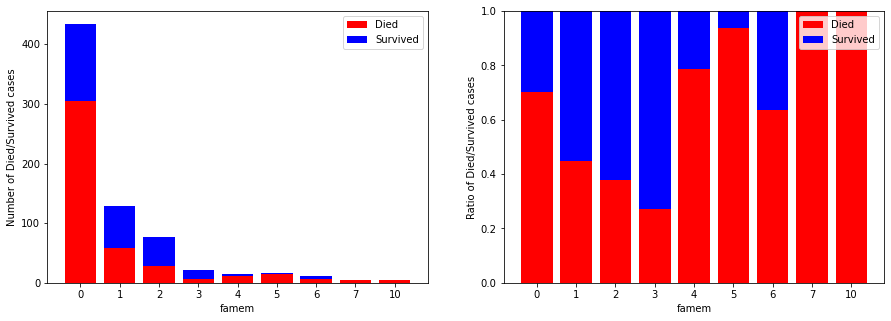

In [35]:
df1, df0, fig = barplot(dataf[['famem','Survived']].copy())

In [36]:
# Note: Possible feature engineerings on the famem column would be to consider
# the feature famem >=4 which has an average death rate of about 80% as can be
# seen from the right barplot above.

In [37]:
######################################################################################################
######################################################################################################
# Embarked Column ####################################################################################

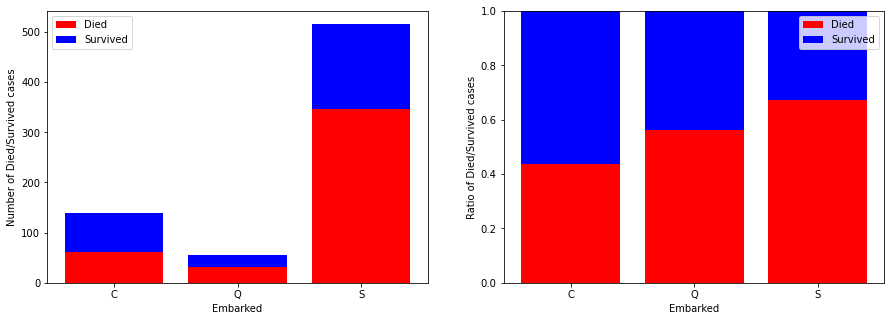

In [38]:
df1, df0, fig = barplot(train[["Embarked","Survived"]].copy())

In [39]:
######################################################################################################
######################################################################################################
# Fare Column ########################################################################################

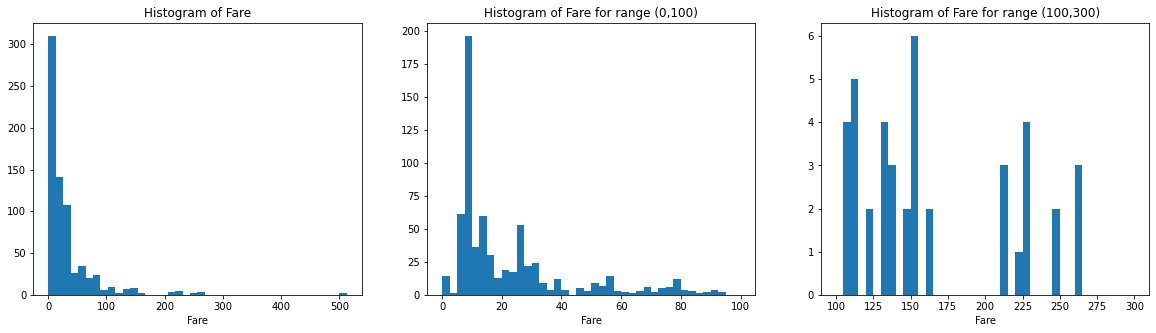

In [40]:
# Plotting the histogram of Fare to find its distribution.

fig , axs = plt.subplots(1,3)
fig.set_size_inches(20,5)


# Histogram of Fare
a = axs[0].hist(train['Fare'],bins=40)
    
    # x-axis label and title
axs[0].set_xlabel('Fare')
axs[0].set_title('Histogram of Fare')


# Histogram of Fare for range (0,100)
b = axs[1].hist(train['Fare'],bins=40, range=(0,100))

    # x-axis label and title
axs[1].set_xlabel('Fare')
axs[1].set_title('Histogram of Fare for range (0,100)')


# Histogram of Fare for range (100,300).
c = axs[2].hist(train['Fare'],bins=40, range=(100,300))

    # x-axis label and title
axs[2].set_xlabel('Fare')
axs[2].set_title('Histogram of Fare for range (100,300)')

plt.show()

In [41]:
(train['Fare'] == 0).sum()

14

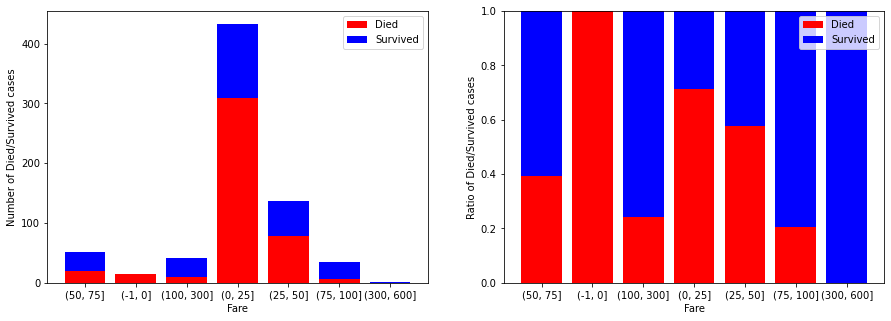

In [42]:
# Discretizing the 'Fare' column

dataf = train[~train["Fare"].isnull()][["Fare","Survived"]]
custom_bucket_array = np.array([-1,0, 25,50,75,100,300,600])
dataf["Fare"] = pd.cut(dataf["Fare"], custom_bucket_array)

# Creating a barplot of the dicretized Fare column relative to Survival rate

df1, df0, fig = barplot(dataf.copy())

In [43]:
# Note: The above analysis shows that (roughly) as fare increases survival rate also
# increases

# Some promising feature engineerings on the fare column would be to create
# a feature of Fare >300 which all have survived and a feature of Fare == 0
# which none have survived. 

In [44]:
######################################################################################################
######################################################################################################
# Age Column ######################################################

/Users/erfanshalchian/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/erfanshalchian/opt/miniconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


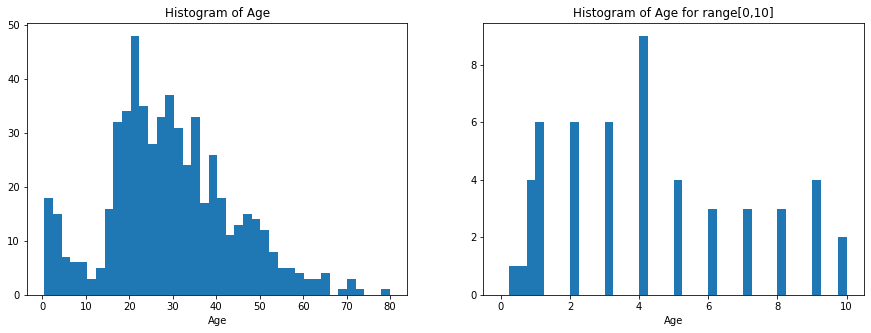

In [45]:
# Plotting the histogram of Age to find its distribution.

fig , axs = plt.subplots(1,2)
fig.set_size_inches(15,5)


# Histogram of Age
a = axs[0].hist(train['Age'],bins=40)

    # x-label and title
axs[0].set_xlabel('Age')
axs[0].set_title('Histogram of Age')


# Histogram of Age for interval (0,10)
b = axs[1].hist(train['Age'],bins=40,range=(0,10))

    # x-label and title
axs[1].set_xlabel('Age')
axs[1].set_title('Histogram of Age for range[0,10]')

plt.show()

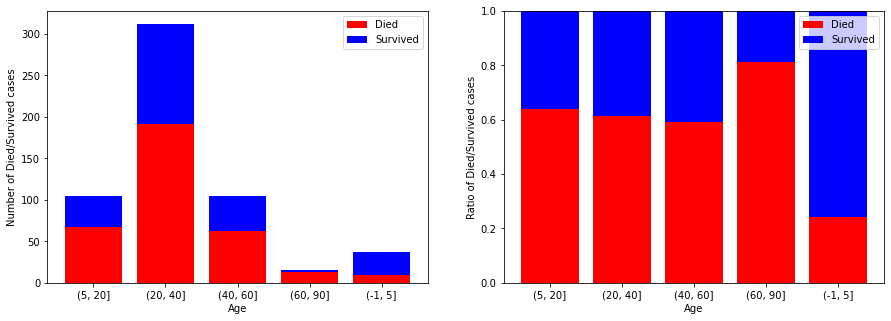

In [46]:
# Discretizing the 'Age' column

dataf = train[~train["Age"].isnull()][["Age","Survived"]]
custom_bucket_array = np.array([-1,5, 20,40,60, 90])
dataf["Age"] = pd.cut(dataf["Age"], custom_bucket_array)

# Creating a barplot of the dicretized Age column relative to Survival rate
df1, df0, fig = barplot(dataf.copy())

In [47]:
# Note: The above analysis shows that as Age increases (roughly) survival rate decreases
# Some promising feature engineerings on the Age column would be to create a column of
# Age > 60 which has a death rate of about 80%.

In [48]:
######################################################################################################
######################################################################################################
# Extracting titles from the Name column #############################################################

In [49]:
# There might be useful information in the titles of the passengers in the Name column.
# Therefore here we will extract the titles and plot their distribution relative to
# the Survived column.

titles = ['Mr.' , 'Mrs.' , 'Miss.' , 'Dr.' , 'Master.']

leng = len(train['Name'])
titleser = pd.Series((-1*np.ones(leng)))

for item in titles:
    for ind,row in enumerate(train['Name']):
        pos = row.find(item)
        if pos != -1:
            titleser[ind] = item

titleser[titleser == -1] = 'other'

# Creating a dataframe dataf with a Title and survived column.

dataf = train[['Survived']].copy()
dataf.insert(0,'Title', titleser)


In [50]:
dataf.head()

,Title,Survived
0,Mr.,1
1,Mr.,0
2,Mr.,0
3,Mrs.,1
4,Mrs.,1


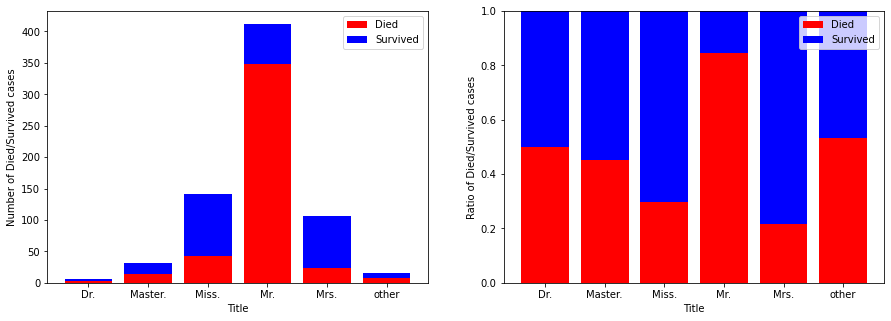

In [51]:
df1, df0, fig = barplot(dataf.copy())

In [52]:
# An interesting observation is to consider Master. title with famem >= 4 column.

# creating a famem column
dataf['famem'] = train['SibSp'] + train['Parch']

dataf.head()

,Title,Survived,famem
0,Mr.,1,0
1,Mr.,0,0
2,Mr.,0,0
3,Mrs.,1,1
4,Mrs.,1,2


In [53]:

df = dataf[(dataf['Title'] == 'Master.')].copy()

df['Master.&famem'] = np.nan

df.loc[(df['famem'] >=4) ,'Master.&famem'] = 'Master.&famem>=4'
df.loc[(df['famem'] <4) ,'Master.&famem'] = 'Master.&famem<4'


In [54]:
df.head()

,Title,Survived,famem,Master.&famem
52,Master.,0,5,Master.&famem>=4
63,Master.,0,5,Master.&famem>=4
104,Master.,0,5,Master.&famem>=4
108,Master.,0,5,Master.&famem>=4
118,Master.,1,6,Master.&famem>=4


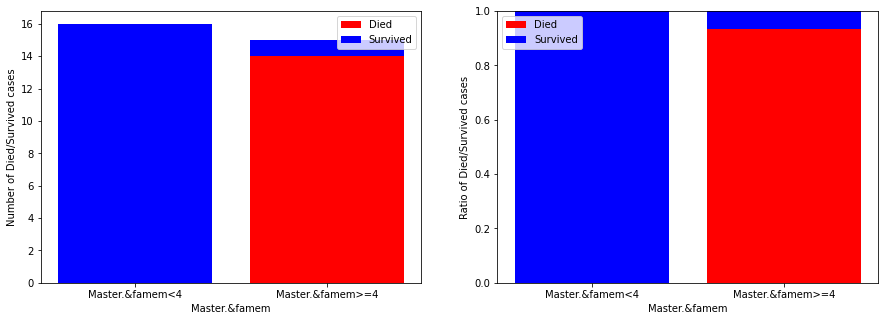

In [55]:
df1, df0, fig = barplot(df[['Master.&famem', 'Survived']])

In [56]:
# Note: A promising feature engineering would be to include a column specific to the Master.
# title, together with famem>=4 column. The Master&famem<4 has a survival rate of 100% and
# the Master&famem>=4 has a death rate of more than 90%.

In [57]:
# Based on the analysis in this notebook candidate extra features to consider for machine
# learning are:

# - Fare > 300
# - Fare == 0
# - Age > 60
# - Master. title
# - famem >=4
# - famem

# Note: There are many useful information in the lastnames of the passengers, Cabin and the
# Ticket column. In the next notebook (Titanic_main) other than the features mentioned above
# we will also incorporate the lastnames of the passengers, Cabin and the Ticket column into
# the machine learning process (we will get their dummy variables).

